# COMP4318/COMP5318 Assignment 2

In this template, we have provided data loading code and section headings to help structure your notebook. Please refer to the assignment specification pdf to guide the content of your notebook and report.


(Add SIDs here)

# Setup

In [1]:
# Please include your imports in this cell
import numpy as np
import matplotlib.pyplot as plt

# Data loading, exploration, and preprocessing

## Data loading

In [2]:
# Load data files assuming Assignment2Data folder 
# is present in the same directory as the notebook
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13673, 28, 28, 3)
(13673,)
(3419, 28, 28, 3)
(3419,)


## Data exploration

Number of classes:  8


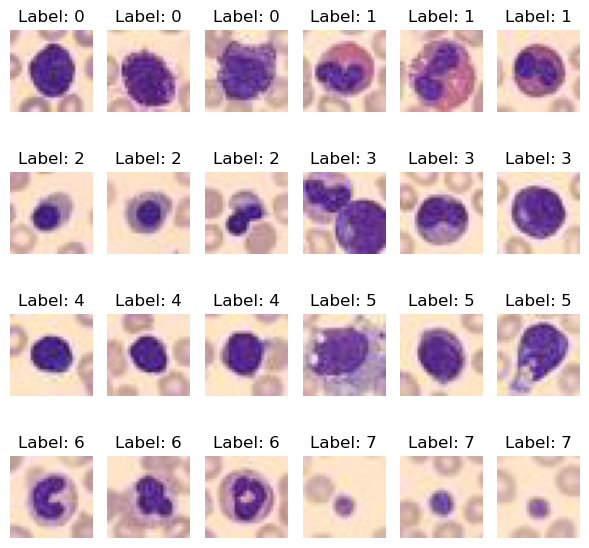

In [3]:
unique_labels_train = np.unique(y_train)
num_classes_train = len(unique_labels_train)
print("Number of classes: ", num_classes_train)

num_classes = num_classes_train

image_indices = []
for i in range(num_classes):
    indices = np.where(y_train == i)[0][:3]
    image_indices.extend(indices)

fig = plt.figure(figsize=(6, 6))  # Increase the figure size

for i, index in enumerate(image_indices):
    ax = fig.add_subplot(4, 6, i+1)
    ax.imshow(X_train[index])
    ax.set_title(f'Label: {y_train[index]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

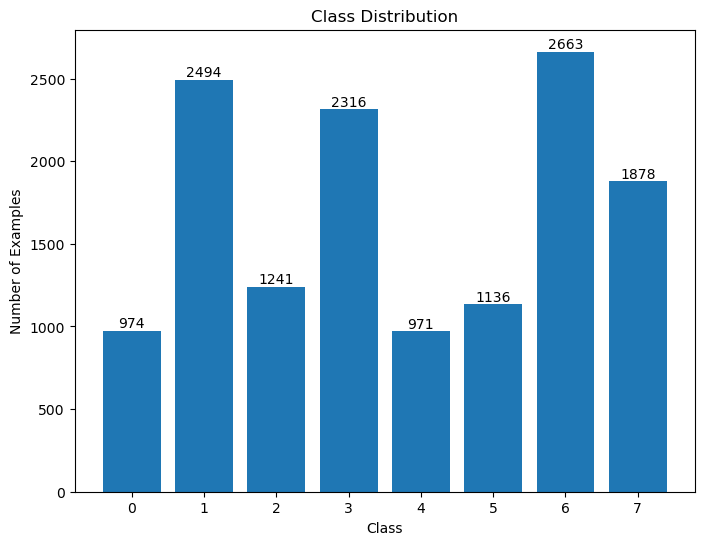

In [4]:
# Calculate class distribution
class_counts = np.bincount(y_train)

# Visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(range(num_classes), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.title('Class Distribution')
plt.xticks(range(num_classes))

# Display number of examples above each bar
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [5]:
from scipy.ndimage.measurements import center_of_mass

# Calculate center of mass for each image
center_of_mass_list = []
for i in range(num_classes_train):
    class_indices = np.where(y_train == i)[0]
    class_images = X_train[class_indices]
    class_com = np.mean([center_of_mass(image) for image in class_images], axis=0)
    center_of_mass_list.append(class_com)

# Calculate average distance from center of mass to image center
image_center = (X_train.shape[1] // 2, X_train.shape[2] // 2, X_train.shape[3] // 2)
average_distances = [np.linalg.norm(class_com - image_center) for class_com in center_of_mass_list]

# Display average distances
for i in range(num_classes_train):
    print(f"Average distance for class {i}: {average_distances[i]}")

Average distance for class 0: 0.8611261050617396
Average distance for class 1: 0.8419120160462501
Average distance for class 2: 0.7741333275455761
Average distance for class 3: 0.9068411515031581
Average distance for class 4: 0.7727474198891529
Average distance for class 5: 0.8292497869644677
Average distance for class 6: 0.8160081367806401
Average distance for class 7: 0.7478272341749216


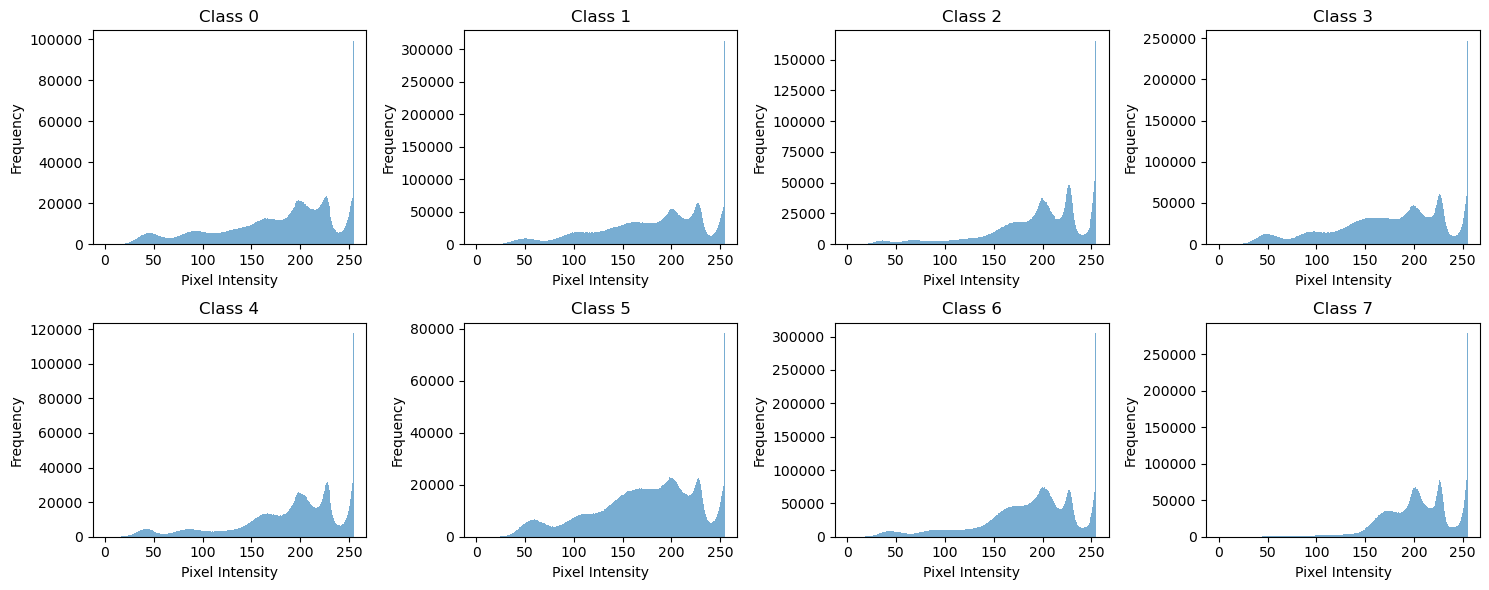

In [6]:
num_rows = 2
num_cols = 4

# Plot pixel intensity distribution for each class
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))
fig.subplots_adjust(hspace=0.5)

for i in range(num_classes):
    class_indices = np.where(y_train == i)[0]
    class_images = X_train[class_indices]

    # Flatten images and concatenate into a single array
    class_pixel_values = class_images.flatten()

    # Determine the subplot location
    row = i // num_cols
    col = i % num_cols

    # Plot histogram in the corresponding subplot
    axes[row, col].hist(class_pixel_values, bins=256, range=(0, 255), alpha=0.6)
    axes[row, col].set_xlabel('Pixel Intensity')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Class {i}')

# Hide any extra subplots
if num_classes % 4 != 0:
    for i in range(num_classes, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity matrix between classes
similarity_matrix = cosine_similarity(X_train.reshape(X_train.shape[0], -1))

# Display similarity matrix as a table
class_names = ['0', '1', '2', '3', '4', '5', '6', '7']

# Print table header
print("Similarity Matrix:")
header = "\t".join(class_names)
print(f"\t{header}")

# Print similarity values
for i in range(num_classes):
    row = [f"{similarity_matrix[i, j]:.3f}" for j in range(num_classes)]
    row_str = "\t".join(row)
    print(f"{class_names[i]}\t{row_str}")

Similarity Matrix:
	0	1	2	3	4	5	6	7
0	1.000	0.928	0.967	0.990	0.968	0.972	0.968	0.963
1	0.928	1.000	0.930	0.917	0.921	0.926	0.920	0.920
2	0.967	0.930	1.000	0.960	0.969	0.977	0.975	0.976
3	0.990	0.917	0.960	1.000	0.961	0.964	0.969	0.955
4	0.968	0.921	0.969	0.961	1.000	0.976	0.973	0.973
5	0.972	0.926	0.977	0.964	0.976	1.000	0.974	0.975
6	0.968	0.920	0.975	0.969	0.973	0.974	1.000	0.973
7	0.963	0.920	0.976	0.955	0.973	0.975	0.973	1.000


## Preprocessing

In [8]:
# 定义需要欠采样的类别
undersample_classes = [1, 3, 6, 7]

# 初始化新的数据集
X_new = []
y_new = []

# 对每个类别进行欠采样
for class_label in range(8):
    indices = np.where(y_train == class_label)[0]
    if class_label in undersample_classes:
        # 对于需要欠采样的类别，随机选择一半的样本
        undersampled_indices = np.random.choice(indices, size=len(indices) // 2, replace=False)
        X_new.append(X_train[undersampled_indices])
        y_new.append(y_train[undersampled_indices])
    else:
        # 对于其他类别，保留所有样本
        X_new.append(X_train[indices])
        y_new.append(y_train[indices])

# 将新的数据集转换为NumPy数组
X_new = np.concatenate(X_new)
y_new = np.concatenate(y_new)

# 打乱数据集
shuffle_indices = np.random.permutation(len(X_new))
X_new = X_new[shuffle_indices]
y_new = y_new[shuffle_indices]

print("New dataset shape:", X_new.shape)

New dataset shape: (8997, 28, 28, 3)


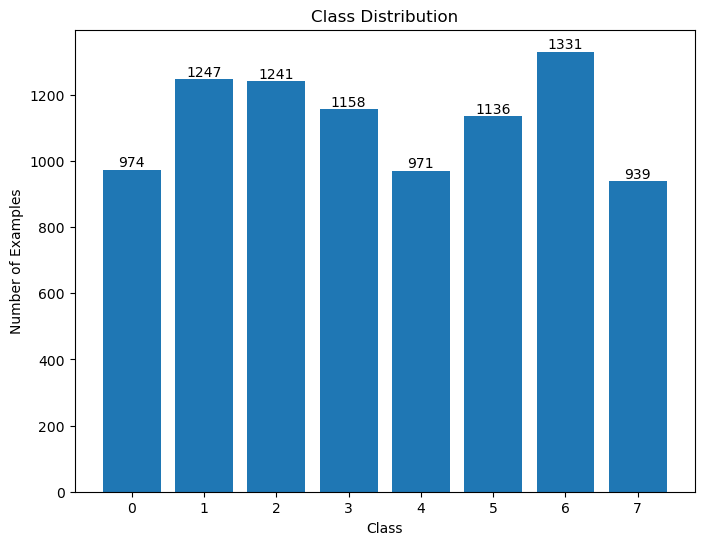

In [9]:
# Calculate class distribution
class_counts = np.bincount(y_new)

# Visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(range(num_classes), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.title('Class Distribution')
plt.xticks(range(num_classes))

# Display number of examples above each bar
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# 创建ImageDataGenerator实例并进行数据增强配置
datagen = ImageDataGenerator(
    rotation_range=10,       # 随机旋转角度范围
    width_shift_range=0.1,   # 随机水平平移范围
    height_shift_range=0.1,  # 随机垂直平移范围
    shear_range=0.2,         # 随机剪切变换范围
    zoom_range=0.2,          # 随机缩放范围
    horizontal_flip=True,    # 随机水平翻转
    fill_mode='nearest'      # 填充像素的策略
)

# 将数据集调整为4维张量 (samples, rows, columns, channels)
X_new = np.reshape(X_new, (len(X_new), 28, 28, 3))

# 定义生成器来生成增强后的图像批次
augmented_images = []
augmented_labels = []
batch_size = 16
epochs = 10

for X_batch, y_batch in datagen.flow(X_new, y_new, batch_size=batch_size, shuffle=True):
    augmented_images.append(X_batch)
    augmented_labels.append(y_batch)
    if len(augmented_images) * batch_size >= epochs * len(X_new):
        break  # 达到指定的训练轮数后停止增强

# 将增强后的图像和标签转换为NumPy数组
augmented_images = np.concatenate(augmented_images)
augmented_labels = np.concatenate(augmented_labels)

# 将图像数据转换回原始形状 (samples, rows, columns, channels)
augmented_images = np.reshape(augmented_images, (len(augmented_images), 28, 28, 3))

# 打乱数据集
shuffle_indices = np.random.permutation(len(augmented_images))
X_new = augmented_images[shuffle_indices]
y_new = augmented_labels[shuffle_indices]
X_new = X_new.astype('float32') / 255.0

## Examples of preprocessed data
Please print/display some examples of your preprocessed data here. 

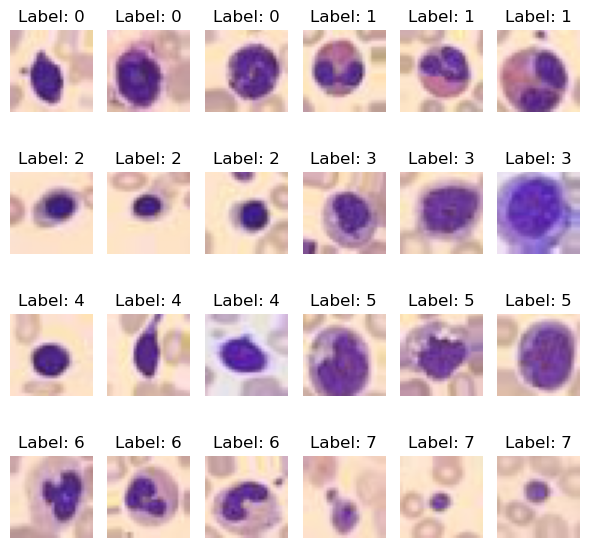

In [11]:
image_indices = []
for i in range(num_classes):
    indices = np.where(y_new == i)[0][:3]
    image_indices.extend(indices)

fig = plt.figure(figsize=(6, 6))  # Increase the figure size

for i, index in enumerate(image_indices):
    ax = fig.add_subplot(4, 6, i+1)
    ax.imshow(X_new[index])
    ax.set_title(f'Label: {y_new[index]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Algorithm design and setup

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2

# Hyperparameter tuning

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2

# Final Models

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2